# 一、导入库

In [14]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 二、读取文件

In [15]:
df = pd.read_csv(r'E:\《搜狐》\大黄实习交接\新建文件夹\广告聚类\ad_performance.csv',encoding='GBK')
df

,渠道代号,日均UV,平均注册率,平均搜索量,访问深度,平均停留时间,订单转化率,投放总时间,素材类型,广告类型,合作方式,广告尺寸,广告卖点
0,A203,3.69,0.0071,0.0214,2.3071,419.77,0.0258,20,jpg,banner,roi,140*40,打折
1,A387,178.70,0.0040,0.0324,2.0489,157.94,0.0030,19,jpg,banner,cpc,140*40,满减
2,A388,91.77,0.0022,0.0530,1.8771,357.93,0.0026,4,jpg,banner,cpc,140*40,满减
3,A389,1.09,0.0074,0.3382,4.2426,364.07,0.0153,10,jpg,banner,cpc,140*40,满减
4,A390,3.37,0.0028,0.1740,2.1934,313.34,0.0007,30,jpg,banner,cpc,140*40,满减
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,A58,8022.95,0.0015,0.0028,1.2836,222.02,0.0006,13,swf,tips,cpm,450*300,打折
885,A174,8900.04,0.0000,0.0011,1.9078,228.05,0.0000,29,swf,不确定,cpc,600*90,打折
886,A105,9320.06,0.0017,0.0061,1.9410,518.54,0.0018,18,swf,不确定,cpm,600*90,打折
887,A99,16516.13,0.0009,0.0059,1.7708,531.53,0.0019,10,swf,不确定,cpm,600*90,打折


# 三、描述统计

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   渠道代号    889 non-null    object 
 1   日均UV    889 non-null    float64
 2   平均注册率   889 non-null    float64
 3   平均搜索量   889 non-null    float64
 4   访问深度    889 non-null    float64
 5   平均停留时间  887 non-null    float64
 6   订单转化率   889 non-null    float64
 7   投放总时间   889 non-null    int64  
 8   素材类型    889 non-null    object 
 9   广告类型    889 non-null    object 
 10  合作方式    889 non-null    object 
 11  广告尺寸    889 non-null    object 
 12  广告卖点    889 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 90.4+ KB


In [17]:
## 针对数据型变量，查看五数概括
df.describe().round(5)
# 平均注册率、平均搜索量、订单转化率的多个字段为0的问题，是由于在打印输出过程中仅保留了2位小数，而这几个统计量的数据本身就非常小，将其通过
# round(3)保留3位小数后就能正常显示。


,日均UV,平均注册率,平均搜索量,访问深度,平均停留时间,订单转化率,投放总时间
count,889.00000,889.00000,889.00000,889.00000,887.00000,889.00000,889.00000
mean,540.84677,0.00141,0.03049,2.16717,262.66919,0.00285,16.05287
std,1634.41046,0.00329,0.10620,3.80053,224.36493,0.01161,8.50944
min,0.06000,0.00000,0.00000,1.00000,1.64000,0.00000,1.00000
25%,6.18000,0.00000,0.00060,1.39230,126.02000,0.00000,9.00000
50%,114.18000,0.00000,0.00320,1.79310,236.55000,0.00020,16.00000
75%,466.87000,0.00140,0.01180,2.21620,357.98500,0.00200,24.00000
max,25294.77000,0.03910,1.03700,98.97990,4450.83000,0.21650,30.00000


In [18]:
## 针对离散型变量，查看其取值情况
df.素材类型.value_counts()
# jpg    536
# swf    348
# gif      4
# sp       1

df.广告类型.value_counts()
# 横幅        348
# 不确定       313
# banner    154
# tips       73

df.合作方式.value_counts()
# cpc    552
# roi    244
# cpm     63
# cpd     30

df.广告尺寸.value_counts()
# 600*90     645
# 308*388    104
# 450*300     54
# 140*40      49
# 900*120     19
# 480*360      9
# 960*126      8
# 390*270      1

df.广告卖点.value_counts()
# 直降    345
# 打折    214
# 满减    154
# 满返     70
# 秒杀     55
# 满赠     51

直降    345
打折    214
满减    154
满返     70
秒杀     55
满赠     51
Name: 广告卖点, dtype: int64

# 四、填补缺失值

In [19]:
# 缺失值
## 可以看到，平均停留时间存在缺失值
df[df.平均停留时间.isna()]
## 查看平均停留时间的定义为：平均停留时间=总停留时间/平均每天的访问量，
## 第一种情况，由于日均UV非0，故说明该两条渠道存在访客，但是访客总停留时间为0，但不太现实
## 第二种情况，落地页数据回传时出现问题，从而停留时间数据并没有回传，导致数据缺失。

# 访问深度=总页面浏览量/平均每天的访问量。由于访问深度为1，说明总页面浏览量=平均每天的访问量，用户是浏览过页面的
# 并且，由于数据集仅有889条数据，数据量并不是特别大，所以可以尝试采用随机森林填充的方法：
# 筛选固定出分类型变量（即控制环境变量），依据数值型变量去对 平均停留时间 进行预测和填充。


,渠道代号,日均UV,平均注册率,平均搜索量,访问深度,平均停留时间,订单转化率,投放总时间,素材类型,广告类型,合作方式,广告尺寸,广告卖点
162,A377,0.75,0.0,0.0,1.0,NaN,0.0,20,swf,不确定,roi,600*90,打折
207,A347,1.53,0.0,0.0,1.0,NaN,0.0,26,swf,不确定,roi,600*90,打折


In [20]:
## 随机森林填补缺失值
## 1. 筛选出素材类型为swf，广告类型为不确定，合作方式为roi，广告尺寸为600-90，广告卖点为打折的数据，共有102条

## 由于是考察用户再落地页的平均停留时间，这可能与素材类型以及广告卖点吸引顾客有关，
# 而广告类型（广告位置）以及合作方式（计费方式）以及广告尺寸（广告创意）等都是在点击广告之前，决定用户是否点击的条件，所以不予以筛选
# 共206条数据。

a = df[(df['素材类型']=='swf')&(df['广告卖点']=='打折')][df.平均停留时间.isnull()]
# &(df['广告类型']=='不确定')&(df['合作方式']=='roi')&(df['广告尺寸']=='600*90')
a.loc[:,['日均UV','平均注册率','平均搜索量','访问深度','平均停留时间','订单转化率','投放总时间']]

,日均UV,平均注册率,平均搜索量,访问深度,平均停留时间,订单转化率,投放总时间
162,0.75,0.0,0.0,1.0,NaN,0.0,20
207,1.53,0.0,0.0,1.0,NaN,0.0,26


In [21]:
from sklearn.ensemble import RandomForestRegressor
def set_mean_retention_time(df):
    ## 选取相同环境的数据
    filter_df = df[(df['素材类型']=='swf')&(df['广告卖点']=='打折')] 
#     &(df['广告类型']=='不确定')&(df['合作方式']=='roi')&(df['广告尺寸']=='600*90')
    
    ## 无缺失值的作为训练数据集，然后训练后用来填补缺失值的两行
    train_df = filter_df[filter_df.平均停留时间.notnull()]
    fill_df = filter_df[filter_df.平均停留时间.isnull()]
    
    ## 提取出自变量和因变量
    x_feature = train_df.loc[:,['日均UV','平均注册率','平均搜索量','访问深度','订单转化率','投放总时间']]
    y_feature = train_df.loc[:,'平均停留时间']
    
    ## 训练模型,均采用默认参数
    rfr = RandomForestRegressor(random_state=0,n_jobs=-1)
    rfr.fit(x_feature, y_feature)
    
    ## 预测，填充
    res = rfr.predict(fill_df.loc[:,['日均UV','平均注册率','平均搜索量','访问深度','订单转化率','投放总时间']])
    return res

In [22]:
set_mean_retention_time(df)

array([355.791 , 387.9165])

In [11]:
## 感觉结果不是特别的准，所以简单调一下参数：n_estimators and max_depth

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

filter_df = df[(df['素材类型']=='swf')&(df['广告卖点']=='打折')]
# &(df['广告类型']=='不确定')&(df['合作方式']=='roi')&(df['广告尺寸']=='600*90'&(df['广告卖点']=='打折'))
    
## 无缺失值的作为训练数据集，然后训练后用来填补缺失值的两行
train_df = filter_df[filter_df.平均停留时间.notnull()]
fill_df = filter_df[filter_df.平均停留时间.isnull()]
    
## 提取出自变量和因变量
x_feature = train_df.loc[:,['日均UV','平均注册率','平均搜索量','访问深度','订单转化率','投放总时间']]
y_feature = train_df.loc[:,'平均停留时间']
    
## 训练模型,均采用默认参数
rfr = RandomForestRegressor(random_state=0,n_jobs=-1)
    
## 调参
    
n_estimators = np.arange(1,50,1)
max_depth = np.arange(1,15,1)     ## 数据量少的，1-10即可
tuned_para = {'n_estimators':n_estimators,'max_depth':max_depth}
grid = GridSearchCV(rfr,tuned_para,cv=10,scoring='neg_mean_squared_log_error',n_jobs=-1)   ## 数据集越小，cv=10，数据集大，cv=5
grid.fit(x_feature, y_feature)

## 打印最佳得分
# 得到最优参数模型
print(grid.best_score_)
print(grid.best_params_)

-0.2758851109569205
{'max_depth': 10, 'n_estimators': 18}


In [23]:
# 利用得到得最优参数再次进行预测
from sklearn.ensemble import RandomForestRegressor
def set_mean_retention_time2(df):
    ## 选取相同环境的数据
    filter_df = df[(df['素材类型']=='swf')&(df['广告卖点']=='打折')]
#     &(df['广告类型']=='不确定')&(df['合作方式']=='roi')&(df['广告尺寸']=='600*90')
    
    ## 无缺失值的作为训练数据集，然后训练后用来填补缺失值的两行
    train_df = filter_df[filter_df.平均停留时间.notnull()]
    fill_df = filter_df[filter_df.平均停留时间.isnull()]
    
    ## 提取出自变量和因变量
    x_feature = train_df.loc[:,['日均UV','平均注册率','平均搜索量','访问深度','订单转化率','投放总时间']]
    y_feature = train_df.loc[:,'平均停留时间']
    
    ## 训练模型,均采用默认参数
    rfr = RandomForestRegressor(n_estimators=18 ,max_depth=10 ,random_state=0,n_jobs=-1)
    rfr.fit(x_feature, y_feature)
    
    ## 预测，填充
    res = rfr.predict(fill_df.loc[:,['日均UV','平均注册率','平均搜索量','访问深度','订单转化率','投放总时间']])
    return res

In [24]:
set_mean_retention_time2(df)

array([333.185     , 384.40166667])

In [25]:
## 缺失值的填补
df.loc[df.平均停留时间.isnull(),'平均停留时间'] =  ([333.19,384.40])
df.isnull().sum()    ## 已经没有缺失值了

渠道代号      0
日均UV      0
平均注册率     0
平均搜索量     0
访问深度      0
平均停留时间    0
订单转化率     0
投放总时间     0
素材类型      0
广告类型      0
合作方式      0
广告尺寸      0
广告卖点      0
dtype: int64

# 五、相关性检验——热力图

In [26]:
corr = np.corrcoef(df.iloc[:,1:8].T)
pd.DataFrame(corr.round(2))

,0,1,2,3,4,5,6
0,1.00,-0.05,-0.07,-0.02,0.03,-0.05,-0.04
1,-0.05,1.00,0.24,0.11,0.22,0.32,-0.01
2,-0.07,0.24,1.00,0.06,0.16,0.13,-0.03
3,-0.02,0.11,0.06,1.00,0.72,0.16,0.06
4,0.03,0.22,0.16,0.72,1.00,0.25,0.05
5,-0.05,0.32,0.13,0.16,0.25,1.00,-0.00
6,-0.04,-0.01,-0.03,0.06,0.05,-0.00,1.00


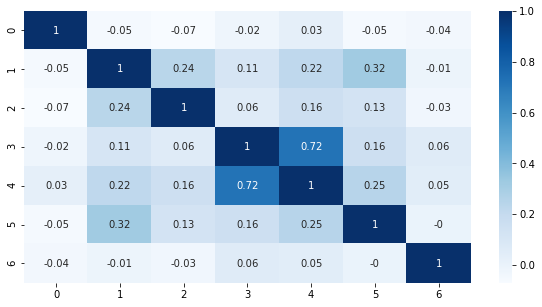

In [27]:
fig,ax = plt.subplots(figsize=(10,5))
sns.heatmap(corr.round(2),annot=True,cmap = 'Blues')   # annot=True表示在方格内显示数值。
plt.show()
## 访问深度 与 平均停留时间相关性较高

In [28]:
# 通过上面的步骤我们知道，平均停留时间和访问深度具有较高的相关性，
# 本次用到的KMeans模块由于是基于距离的计算，因此较高的相关性会在一定程度上导致距离计算的偏差，
# 即数据之间的相似度会由于两个具有较高相关性的指标而“过度相似”。

# 六、数值变量归一化+类别变量哑变量

对于KMeans而言，由于是距离度量，所以变量间的相关性会影响到距离的计算。此前热力图可知，访问深度 与 平均停留时间相关性较高，为0.72，而在探索中发现，PCA效果对于Kmeans来说较差，所以只能从删减变量角度考虑。由于本次聚类更注重是在 广告投放 方面的建议和统计分析，故去掉平均停留时间 这个变量。 因为平均停留时间 更像是广告优化方面的变量，当考虑广告优化角度时，可以纳入这个比例，而对于广告投放方面 并不是特别相关，故予以剔除。

而对于DBSCAN而言，可以暂时保留，以待后续探索。

In [29]:
## 由于存在分类变量，故需要将其进行哑变量处理
# 去掉没用的第一列
df.pop('渠道代号') 
## 先复制到db_df，DBSCAN好做PCA
db_df = df.copy() 
df.pop('平均停留时间')
trr = df.copy() 
df = pd.get_dummies(df)
df

,日均UV,平均注册率,平均搜索量,访问深度,订单转化率,投放总时间,素材类型_gif,素材类型_jpg,素材类型_sp,素材类型_swf,...,广告尺寸_480*360,广告尺寸_600*90,广告尺寸_900*120,广告尺寸_960*126,广告卖点_打折,广告卖点_满减,广告卖点_满赠,广告卖点_满返,广告卖点_直降,广告卖点_秒杀
0,3.69,0.0071,0.0214,2.3071,0.0258,20,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,178.70,0.0040,0.0324,2.0489,0.0030,19,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,91.77,0.0022,0.0530,1.8771,0.0026,4,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1.09,0.0074,0.3382,4.2426,0.0153,10,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3.37,0.0028,0.1740,2.1934,0.0007,30,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,8022.95,0.0015,0.0028,1.2836,0.0006,13,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
885,8900.04,0.0000,0.0011,1.9078,0.0000,29,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
886,9320.06,0.0017,0.0061,1.9410,0.0018,18,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
887,16516.13,0.0009,0.0059,1.7708,0.0019,10,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [31]:
## 数值型变量，归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.iloc[:,:6] = scaler.fit_transform(df.iloc[:,:6])
df

,日均UV,平均注册率,平均搜索量,访问深度,订单转化率,投放总时间,素材类型_gif,素材类型_jpg,素材类型_sp,素材类型_swf,...,广告尺寸_480*360,广告尺寸_600*90,广告尺寸_900*120,广告尺寸_960*126,广告卖点_打折,广告卖点_满减,广告卖点_满赠,广告卖点_满返,广告卖点_直降,广告卖点_秒杀
0,0.000144,0.181586,0.020636,0.013340,0.119169,0.655172,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.007062,0.102302,0.031244,0.010705,0.013857,0.620690,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.003626,0.056266,0.051109,0.008952,0.012009,0.103448,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.000041,0.189258,0.326133,0.033095,0.070670,0.310345,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.000131,0.071611,0.167792,0.012180,0.003233,1.000000,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.317177,0.038363,0.002700,0.002894,0.002771,0.413793,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
885,0.351851,0.000000,0.001061,0.009265,0.000000,0.965517,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
886,0.368456,0.043478,0.005882,0.009604,0.008314,0.586207,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
887,0.652946,0.023018,0.005689,0.007867,0.008776,0.310345,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


# 七、KMeans模型（KMeans++）

K值的确定一直是KMeans算法的关键 ,而由于KMeans是一个非监督式学习，因此没
有所谓的"最佳”K值。但是，从数据本身的特征来讲，最佳K值对应的类别下应该是
类内距离最小化并且类间距离最大化。有多个指标可以用来评估这种特征，比如平均
轮廓系数、类内距离或类间距离等。基于这种思路，我们可以通过枚举法，计算每个
K下的平均轮廓系数值，然后选出平均轮廓系数最大的K值。

In [32]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score   # 导入轮廓系数
## 通过平均轮廓系数检验得到最佳KMeans聚类模型。
score_list =[]
silhouette_initial = -1
for n_clusters in range(2,6):
    kmeans = KMeans(n_clusters = n_clusters)
    res = kmeans.fit_predict(df)
    silhouette_res = silhouette_score(df,res)
    if silhouette_res > silhouette_initial:
        best_k = n_clusters
        silhouette_initial = silhouette_res
        best_kmeans = kmeans
        best_res = res
    score_list.append([n_clusters,silhouette_res])
print(score_list)
print('Best K is:{0} with average silhouette of {1}'.format(best_k,silhouette_initial))

[[2, 0.3865549293769708], [3, 0.4575788262257561], [4, 0.5020981194788051], [5, 0.49653988898338514]]
Best K is:4 with average silhouette of 0.5020981194788051


In [33]:
best_res

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1,

In [34]:
## 针对聚类结果的特征分析
cluster_res = pd.DataFrame(best_res)  ## 转换成数据框
## 然后合并
cluster_df = pd.concat([df,cluster_res],axis=1).rename(columns={0:'cluster'})
## 查看
cluster_df

,日均UV,平均注册率,平均搜索量,访问深度,订单转化率,投放总时间,素材类型_gif,素材类型_jpg,素材类型_sp,素材类型_swf,...,广告尺寸_600*90,广告尺寸_900*120,广告尺寸_960*126,广告卖点_打折,广告卖点_满减,广告卖点_满赠,广告卖点_满返,广告卖点_直降,广告卖点_秒杀,cluster
0,0.000144,0.181586,0.020636,0.013340,0.119169,0.655172,0,1,0,0,...,0,0,0,1,0,0,0,0,0,3
1,0.007062,0.102302,0.031244,0.010705,0.013857,0.620690,0,1,0,0,...,0,0,0,0,1,0,0,0,0,3
2,0.003626,0.056266,0.051109,0.008952,0.012009,0.103448,0,1,0,0,...,0,0,0,0,1,0,0,0,0,3
3,0.000041,0.189258,0.326133,0.033095,0.070670,0.310345,0,1,0,0,...,0,0,0,0,1,0,0,0,0,3
4,0.000131,0.071611,0.167792,0.012180,0.003233,1.000000,0,1,0,0,...,0,0,0,0,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.317177,0.038363,0.002700,0.002894,0.002771,0.413793,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
885,0.351851,0.000000,0.001061,0.009265,0.000000,0.965517,0,0,0,1,...,1,0,0,1,0,0,0,0,0,2
886,0.368456,0.043478,0.005882,0.009604,0.008314,0.586207,0,0,0,1,...,1,0,0,1,0,0,0,0,0,2
887,0.652946,0.023018,0.005689,0.007867,0.008776,0.310345,0,0,0,1,...,1,0,0,1,0,0,0,0,0,2


In [35]:
## 聚合
group1 = cluster_df.groupby('cluster')
cluster_group = pd.DataFrame(group1.size()).rename(columns={0:'cluster_counts'}).T
cluster_ratio = (cluster_group/len(cluster_df)).round(4)
cluster_ratio
# cluster_group

cluster,0,1,2,3
cluster_counts,0.3926,0.0821,0.3521,0.1732


In [36]:
## 获取聚类后各个类别的概括
cluster_trr = pd.concat([trr,cluster_res],axis=1).rename(columns={0:'cluster'})
cluster_trr
cluster_info=[]
for i in range(best_k):
    num_clus = cluster_trr[cluster_trr['cluster']== i].iloc[:,:6].describe().round(3).iloc[1,:]    ## 获取所有数值型变量列的均值
    cate_clus = cluster_trr[cluster_trr['cluster']== i].iloc[:,6:11].describe().iloc[2,:]            ## 获取所有类别型变量出现最多的值
    ## 合并
    combine = pd.concat([num_clus,cate_clus],axis=0)
    cluster_info.append(combine)

cluster_info = pd.DataFrame(cluster_info)
cluster_info

,日均UV,平均注册率,平均搜索量,访问深度,订单转化率,投放总时间,素材类型,广告类型,合作方式,广告尺寸,广告卖点
0,300.205,0.001,0.016,2.270,0.002,15.350,jpg,横幅,cpc,600*90,直降
1,1401.525,0.001,0.033,1.727,0.002,15.603,swf,tips,cpm,450*300,打折
2,572.521,0.001,0.051,2.145,0.004,17.125,swf,不确定,roi,600*90,打折
3,613.836,0.003,0.020,2.190,0.003,15.682,jpg,banner,cpc,308*388,满减


In [37]:
## 以上，很难直观地发现不同类别的显著特征，所以画雷达图
## 先标准化
## StandardScaler()是按照列来标准化的
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
# scaler = MinMaxScaler()
cluster_info.iloc[:,:6] = scaler.fit_transform(cluster_info.iloc[:,:6])
tmp = cluster_info.iloc[:,:6]
tmp

,日均UV,平均注册率,平均搜索量,访问深度,订单转化率,投放总时间
0,-1.027822,-0.577350,-1.025153,0.888971,-0.904534,-0.848842
1,1.655715,-0.577350,0.219676,-1.692372,-0.904534,-0.484847
2,-0.364282,-0.577350,1.537729,0.294739,1.507557,1.704878
3,-0.263611,1.732051,-0.732252,0.508662,0.301511,-0.371189


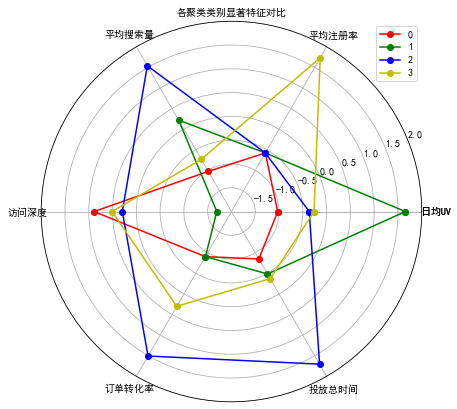

In [43]:
## 再画雷达图
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus'] = False
# fig,ax = plt.subplots(11,subplot_kw=dict(polar=True))
fig = plt.figure(figsize=(7,7))  # 建立画布
ax = fig.add_subplot(111, polar=True)  # 增加子网格，注意polar参数
labels = np.array(tmp.T.index)    # 设置要展示的数据标签
cor_list = [ 'r', 'g','b', 'y', 'c']  # 定义不同类别的颜色'b',
angle = np.linspace(0, 2*np.pi, len(labels), endpoint=False) 
angles = np.concatenate((angle, [angle[0]])) 
labels = np.concatenate((labels,[labels[0]]))   # 新版本增加，对labels进行封闭
#data里有几个数据，就把整圆360°分成几份，计算各个区间的角度
for i in range(len(tmp)):  # 循环每个类别
    data_tmp = tmp.iloc[i,:]  # 获得对应类数据
    data = np.concatenate((data_tmp,[data_tmp[0]]))  # 建立相同首尾字段以便于闭合
    ax.plot(angles,data,'o-',c=cor_list[i], label=i)  # 画线
ax.set_thetagrids(angles*180/np.pi, labels, fontproperties="SimHei")  # 设置极坐标
ax.set_title("各聚类类别显著特征对比", fontproperties="SimHei")
ax.set_rlim(-2,2)   # 设置坐标轴尺度范围
plt.legend(loc=0)  ## 设置图例位置

## 分析：
kmeans聚成了四类，可以看到，

聚类1（索引为0）：虽然这类广告媒体的日均UV处于中等水平，可能由于其合作的方式主要为ROI，追求得是投资回报率，因此日均UV并不是特别高，但是在订单转化率、平均搜索量以及投放总时间等指标上表现优异，属于优质广告媒体，**其“引流和拉新”的特征比较明显，比较符合广告媒体中引流的角色定位，**且其占比为35%，也是广告媒体的主体渠道之一。

聚类2（索引为1）：该类广告媒体的平均注册率处于较高水平，远超其余类别得广告媒体，访问深度和订单转化率等指标上的表现都还不错，是一类**综合效果比较好**的媒体类。其广告卖点以满减为主，以jpg+bannner的大尺寸广告组合形式，可以很好地吸引用户点击，点击后广告卖点更能吸引该类广告媒体平台上的用户，也具有**“引流和拉新”的特征**。

聚类3（索引为2）：该类广告媒体的日均UV非常高，可能是由于其合作方式主要为cpm，所以广告媒体平台以曝光为主，uv会比较多；但是其访问深度、订单转化率\平均注册率都很低，**说明该广告的效果并不好，只是广告媒体消耗了出去，却没有很好的“引流”。**

聚类4（索引为3）：该类广告媒体除了访问深度指标较高外，其余指标均处于最低值处，因此**此类广告媒体效果质量属于“欠佳”的情况，**并且由于其占比为39%，因此这是广告媒体的主体渠道之一。


# 八、PCA+DBSCAN---用来寻找异常值

In [44]:
db_df

,日均UV,平均注册率,平均搜索量,访问深度,平均停留时间,订单转化率,投放总时间,素材类型,广告类型,合作方式,广告尺寸,广告卖点
0,3.69,0.0071,0.0214,2.3071,419.77,0.0258,20,jpg,banner,roi,140*40,打折
1,178.70,0.0040,0.0324,2.0489,157.94,0.0030,19,jpg,banner,cpc,140*40,满减
2,91.77,0.0022,0.0530,1.8771,357.93,0.0026,4,jpg,banner,cpc,140*40,满减
3,1.09,0.0074,0.3382,4.2426,364.07,0.0153,10,jpg,banner,cpc,140*40,满减
4,3.37,0.0028,0.1740,2.1934,313.34,0.0007,30,jpg,banner,cpc,140*40,满减
...,...,...,...,...,...,...,...,...,...,...,...,...
884,8022.95,0.0015,0.0028,1.2836,222.02,0.0006,13,swf,tips,cpm,450*300,打折
885,8900.04,0.0000,0.0011,1.9078,228.05,0.0000,29,swf,不确定,cpc,600*90,打折
886,9320.06,0.0017,0.0061,1.9410,518.54,0.0018,18,swf,不确定,cpm,600*90,打折
887,16516.13,0.0009,0.0059,1.7708,531.53,0.0019,10,swf,不确定,cpm,600*90,打折


## 归一化

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
db_df.iloc[:,:7] = scaler.fit_transform(db_df.iloc[:,:7])
db_df

,日均UV,平均注册率,平均搜索量,访问深度,平均停留时间,订单转化率,投放总时间,素材类型,广告类型,合作方式,广告尺寸,广告卖点
0,-0.328840,1.730614,-0.085669,0.036840,0.700266,1.978092,0.464115,jpg,banner,roi,140*40,打折
1,-0.221701,0.788120,0.017969,-0.031136,-0.468432,0.012789,0.346532,jpg,banner,cpc,140*40,满减
2,-0.274918,0.240865,0.212053,-0.076365,0.424239,-0.021690,-1.417210,jpg,banner,cpc,140*40,满减
3,-0.330431,1.821823,2.899088,0.546398,0.451645,1.073018,-0.711713,jpg,banner,cpc,140*40,满减
4,-0.329036,0.423283,1.352065,0.006907,0.225208,-0.185465,1.639942,jpg,banner,cpc,140*40,满减
...,...,...,...,...,...,...,...,...,...,...,...,...
884,4.580437,0.028043,-0.260910,-0.232616,-0.182406,-0.194085,-0.358965,swf,tips,cpm,450*300,打折
885,5.117380,-0.428002,-0.276927,-0.068283,-0.155491,-0.245803,1.522359,swf,不确定,cpc,600*90,打折
886,5.374510,0.088849,-0.229819,-0.059543,1.141133,-0.090648,0.228949,swf,不确定,cpm,600*90,打折
887,9.779842,-0.154375,-0.231703,-0.104351,1.199115,-0.082028,-0.711713,swf,不确定,cpm,600*90,打折


## PCA降维--消除变量的相关性

In [46]:
from sklearn.decomposition import PCA
## 保留原始变量80%的信息
pca = PCA(n_components=0.8)
new_db_df = pca.fit_transform(db_df.iloc[:,:7])
# print(newdf)
print((pca.explained_variance_ratio_).round(3))
print('\n')
# print(pca.explained_variance_)
# print('\n')
a = pca.components_
print(pca.components_)

[0.289 0.176 0.148 0.133 0.124]


[[-0.04682699  0.36461935  0.26301632  0.54054302  0.59710261  0.38054328
   0.04637783]
 [ 0.29164849 -0.49660198 -0.46095192  0.44388245  0.3201267  -0.32920631
   0.21900098]
 [ 0.68363617  0.06489082 -0.00707585 -0.02166482  0.05408698  0.06073877
  -0.72200882]
 [ 0.61616441  0.26961064 -0.0906704  -0.22143077 -0.10609815  0.28424843
   0.63114565]
 [-0.24318776  0.09710613 -0.7772514  -0.00743151 -0.06123618  0.54192458
  -0.17269344]]


In [47]:
## 保留80%的方差
pd.DataFrame(a.T.round(4)).rename(columns={0:'pca1',1:'pca2',2:'pca3',3:'pca4',4:'pca5',5:'pca6'})
# 行字段的含义：
# 0:日均UV
# 1:平均注册率
# 2:平均搜索量
# 3:访问深度
# 4:平均停留时间
# 5:订单转化率
# 6:投放总时间

,pca1,pca2,pca3,pca4,pca5
0,-0.0468,0.2916,0.6836,0.6162,-0.2432
1,0.3646,-0.4966,0.0649,0.2696,0.0971
2,0.2630,-0.4610,-0.0071,-0.0907,-0.7773
3,0.5405,0.4439,-0.0217,-0.2214,-0.0074
4,0.5971,0.3201,0.0541,-0.1061,-0.0612
5,0.3805,-0.3292,0.0607,0.2842,0.5419
6,0.0464,0.2190,-0.7220,0.6311,-0.1727


In [48]:
pca_df = pd.concat([pd.DataFrame(new_db_df).rename(columns={0:'pca1',1:'pca2',2:'pca3',3:'pca4',4:'pca5'}),db_df.iloc[:,7:]],axis=1)
pca_df = pd.get_dummies(pca_df)
pca_df

,pca1,pca2,pca3,pca4,pca5,素材类型_gif,素材类型_jpg,素材类型_sp,素材类型_swf,广告类型_banner,...,广告尺寸_480*360,广告尺寸_600*90,广告尺寸_900*120,广告尺寸_960*126,广告卖点_打折,广告卖点_满减,广告卖点_满赠,广告卖点_满返,广告卖点_直降,广告卖点_秒杀
0,1.836200,-1.224875,-0.289770,1.044479,1.263281,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.026877,-0.556421,-0.374632,0.353193,0.092483,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.294525,-0.498857,0.872706,-1.052414,0.133005,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,2.382605,-2.459421,0.463439,-0.288378,-1.323368,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.669045,-0.434037,-1.390327,0.745690,-1.327331,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,-0.598046,1.265852,3.377580,2.642654,-0.938681,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
885,-0.621215,2.166905,2.351594,3.985441,-1.456883,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
886,0.345589,2.048140,3.573802,3.367220,-1.277859,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
887,0.020175,3.244431,7.253474,5.428750,-2.207436,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


## 建模DBSCAN

In [49]:
## 不调参的DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(min_samples=21)
res_db = db.fit_predict(pca_df)
# res_db = pd.DataFrame(res_db)
# res_db.value_counts()
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [50]:
pd.DataFrame(db.labels_).value_counts()

-1    638
 1    199
 0     52
dtype: int64

In [51]:
## 将标签加到pca_df中
db_cluster_df = pd.concat([pca_df,pd.DataFrame(db.labels_)],axis=1).rename(columns={0:'DB_cluster'})
db_cluster_df

,pca1,pca2,pca3,pca4,pca5,素材类型_gif,素材类型_jpg,素材类型_sp,素材类型_swf,广告类型_banner,...,广告尺寸_600*90,广告尺寸_900*120,广告尺寸_960*126,广告卖点_打折,广告卖点_满减,广告卖点_满赠,广告卖点_满返,广告卖点_直降,广告卖点_秒杀,DB_cluster
0,1.836200,-1.224875,-0.289770,1.044479,1.263281,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,-1
1,0.026877,-0.556421,-0.374632,0.353193,0.092483,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,-1
2,0.294525,-0.498857,0.872706,-1.052414,0.133005,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,-1
3,2.382605,-2.459421,0.463439,-0.288378,-1.323368,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,-1
4,0.669045,-0.434037,-1.390327,0.745690,-1.327331,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,-0.598046,1.265852,3.377580,2.642654,-0.938681,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,-1
885,-0.621215,2.166905,2.351594,3.985441,-1.456883,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,-1
886,0.345589,2.048140,3.573802,3.367220,-1.277859,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,-1
887,0.020175,3.244431,7.253474,5.428750,-2.207436,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,-1


## DBSCAN调参
寻找最优的eps，半径

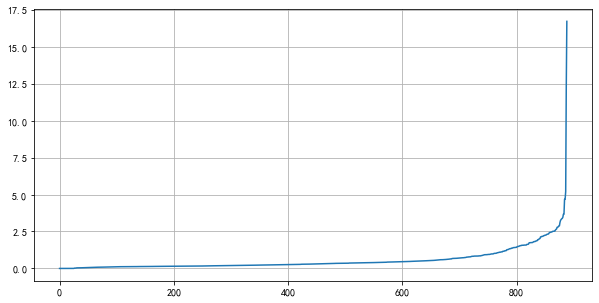

In [52]:
from sklearn.neighbors import NearestNeighbors
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=21).fit(db_cluster_df)
distances, idx = nn.kneighbors(db_cluster_df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances)
plt.show()

In [53]:
## 通过平均轮廓系数检验得到最佳DBSCAN聚类模型。
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score   # 导入轮廓系数
score_list_db =[]
silhouette_initial = -1
for minpts in range(21,70):
    for eps in np.arange(2.4,2.6,0.1):    # 低于0.3，分成一类
        res_db = DBSCAN(min_samples=minpts,eps=eps).fit_predict(pca_df)
        silhouette_res_db = silhouette_score(pca_df,res_db)
        if silhouette_res_db > silhouette_initial:
            best_eps = eps
            best_minpts = minpts
            silhouette_initial = silhouette_res_db
            best_db = DBSCAN(min_samples=minpts,eps=eps)
            best_res_db = res_db
        score_list_db.append([eps,silhouette_res_db])
# print(score_list_db)
print('Best eps is:{0} with average silhouette of {1}'.format(best_eps,silhouette_initial))
print('Best minpts is:{0} with average silhouette of {1}'.format(best_minpts,silhouette_initial))

Best eps is:2.6 with average silhouette of 0.5547978659133085
Best minpts is:21 with average silhouette of 0.5547978659133085


In [54]:
# 调参后DBSCAN
db = DBSCAN(min_samples=21,eps=2.6)
res_db = db.fit_predict(pca_df)
# res_db = pd.DataFrame(res_db)
# res_db.value_counts()
db.labels_

array([ 0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1, -1,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [55]:
pd.DataFrame(db.labels_).value_counts()
# 分成两类

 0    830
-1     59
dtype: int64

In [56]:
## 将标签加到pca_df中
db_cluster_df = pd.concat([pca_df,pd.DataFrame(db.labels_)],axis=1).rename(columns={0:'DB_cluster'})
db_cluster_df

,pca1,pca2,pca3,pca4,pca5,素材类型_gif,素材类型_jpg,素材类型_sp,素材类型_swf,广告类型_banner,...,广告尺寸_600*90,广告尺寸_900*120,广告尺寸_960*126,广告卖点_打折,广告卖点_满减,广告卖点_满赠,广告卖点_满返,广告卖点_直降,广告卖点_秒杀,DB_cluster
0,1.836200,-1.224875,-0.289770,1.044479,1.263281,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0.026877,-0.556421,-0.374632,0.353193,0.092483,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.294525,-0.498857,0.872706,-1.052414,0.133005,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,2.382605,-2.459421,0.463439,-0.288378,-1.323368,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,-1
4,0.669045,-0.434037,-1.390327,0.745690,-1.327331,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,-0.598046,1.265852,3.377580,2.642654,-0.938681,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,-1
885,-0.621215,2.166905,2.351594,3.985441,-1.456883,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,-1
886,0.345589,2.048140,3.573802,3.367220,-1.277859,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,-1
887,0.020175,3.244431,7.253474,5.428750,-2.207436,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,-1


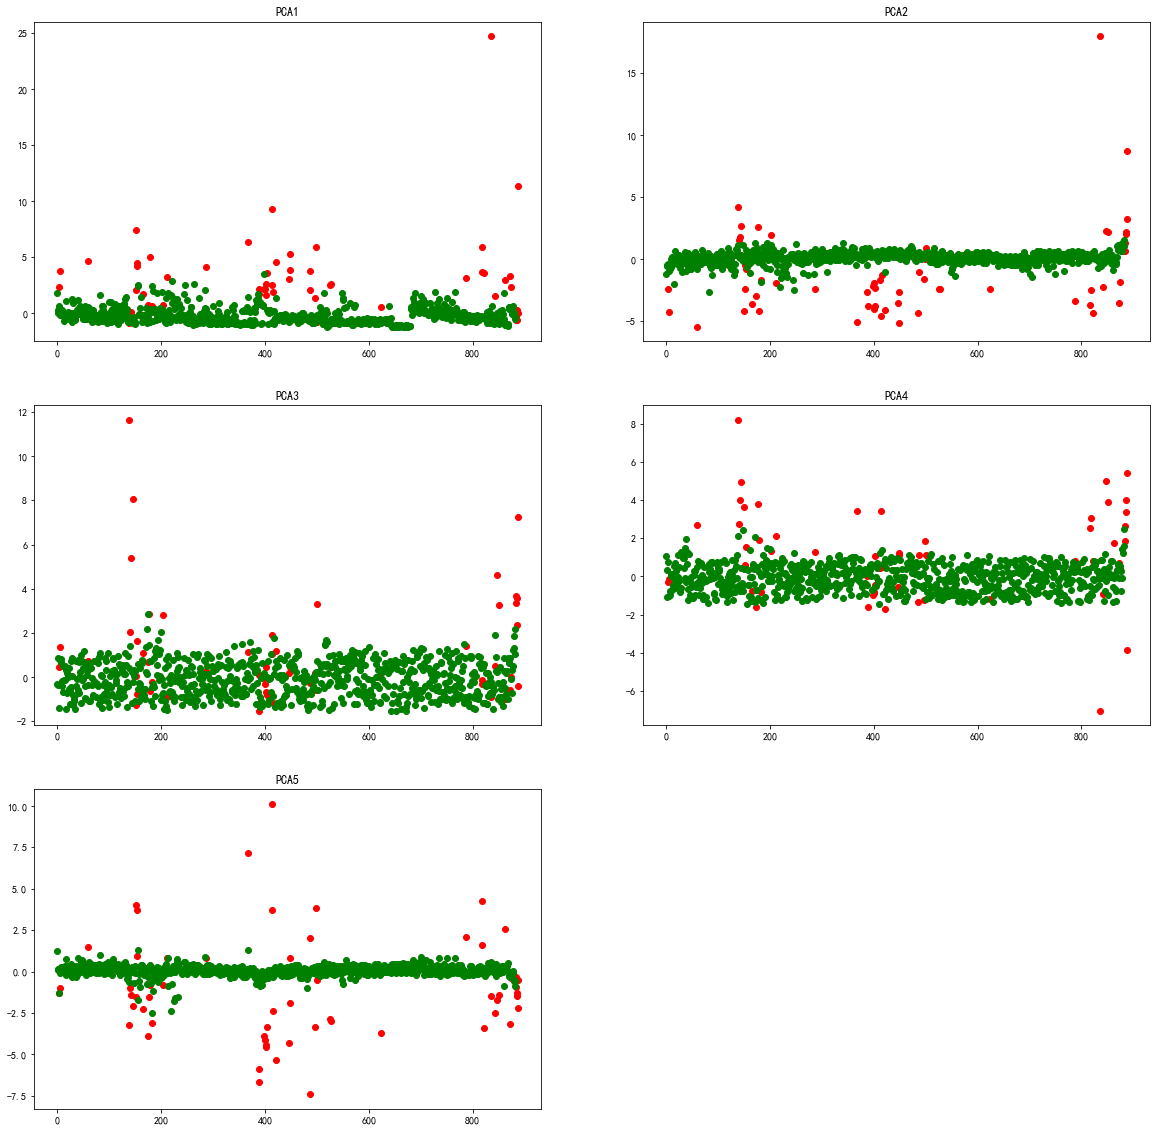

In [57]:
## 合并主成分图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(20,20))
## 第一个图
ax1 = fig.add_subplot(321)
ax1.plot(db_cluster_df[db_cluster_df['DB_cluster']== -1]['pca1'],'o',color='r')
ax1.plot(db_cluster_df[db_cluster_df['DB_cluster']== 0]['pca1'],'o',color='g')
ax1.set(title='PCA1')
## 第二个图
ax2 = fig.add_subplot(322)
ax2.plot(db_cluster_df[db_cluster_df['DB_cluster']== -1]['pca2'],'o',color='r')
ax2.plot(db_cluster_df[db_cluster_df['DB_cluster']== 0]['pca2'],'o',color='g')
ax2.set(title='PCA2')
## 第三个图
ax3 = fig.add_subplot(323)
ax3.plot(db_cluster_df[db_cluster_df['DB_cluster']== -1]['pca3'],'o',color='r')
ax3.plot(db_cluster_df[db_cluster_df['DB_cluster']== 0]['pca3'],'o',color='g')
ax3.set(title='PCA3')
## 第四个图
ax4 = fig.add_subplot(324)
ax4.plot(db_cluster_df[db_cluster_df['DB_cluster']== -1]['pca4'],'o',color='r')
ax4.plot(db_cluster_df[db_cluster_df['DB_cluster']== 0]['pca4'],'o',color='g')
ax4.set(title='PCA4')
## 第五个图
ax5 = fig.add_subplot(325)
ax5.plot(db_cluster_df[db_cluster_df['DB_cluster']== -1]['pca5'],'o',color='r')
ax5.plot(db_cluster_df[db_cluster_df['DB_cluster']== 0]['pca5'],'o',color='g')
ax5.set(title='PCA5')

plt.show()

## 类别型变量——高频统计

In [58]:
db_cluster_n = pd.concat([trr,pd.DataFrame(db.labels_)],axis=1).rename(columns={0:'DB_cluster'})
db_cluster_n
cluster_info_db=[]
for i in [-1,0]:
    cate_clus_db = db_cluster_n[db_cluster_n['DB_cluster']== i].iloc[:,6:11].describe().iloc[2,:]            ## 获取所有类别型变量出现最多的值
    ## 合并
    cluster_info_db.append(cate_clus_db)
    
pd.DataFrame(cluster_info_db)

,素材类型,广告类型,合作方式,广告尺寸,广告卖点
top,swf,不确定,cpc,600*90,直降
top,jpg,横幅,cpc,600*90,直降


In [59]:
## 类别比例统计
## 聚合
group2 = db_cluster_df.groupby('DB_cluster')
cluster_group_db = pd.DataFrame(group2.size()).rename(columns={0:'cluster_counts'}).T
cluster_ratio_db = (cluster_group_db/len(db_cluster_df)).round(4)
cluster_ratio_db = pd.DataFrame(cluster_ratio_db)#.rename(columns={-1:'error'})
# cluster_ratio_db.pop('error')
cluster_ratio_db
# cluster_group_db.pop(-1)
# cluster_group_db

DB_cluster,-1,0
cluster_counts,0.0664,0.9336


## 雷达图

In [61]:
tmp_1 = db_cluster_df.iloc[:,:5]
tmp_db = pd.concat([tmp_1,pd.DataFrame(db.labels_)],axis=1).rename(columns={0:'DB_cluster'})
tmp_db
tmp_2 = []
for i in [-1,0]:
    tmp_3 = tmp_db[tmp_db['DB_cluster']==i].describe().round(5).iloc[1,:5]
    tmp_2.append(tmp_3)
    
    
tmp_2 = pd.DataFrame(tmp_2)
tmp_2

,pca1,pca2,pca3,pca4,pca5
mean,2.97826,-1.12524,1.15010,1.06316,-1.05739
mean,-0.21171,0.07999,-0.08175,-0.07557,0.07516


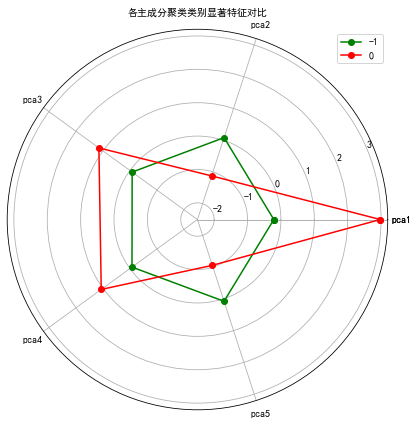

In [62]:
## 再画雷达图
# tmp_1 = db_cluster_df.iloc[:,:3]
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus'] = False
# fig,ax = plt.subplots(11,subplot_kw=dict(polar=True))
fig = plt.figure(figsize=(7,7))  # 建立画布
ax = fig.add_subplot(111, polar=True)  # 增加子网格，注意polar参数
labels = np.array(tmp_2.T.index)    # 设置要展示的数据标签
cor_list = [ 'r', 'm','y', 'b', 'c','g']  # 定义不同类别的颜色'b',
angle = np.linspace(0, 2*np.pi, len(labels), endpoint=False) 
angles = np.concatenate((angle, [angle[0]])) 
labels = np.concatenate((labels,[labels[0]]))   # 新版本增加，对labels进行封闭
#data里有几个数据，就把整圆360°分成几份，计算各个区间的角度
for i in [-1,0]:  # 循环每个类
    data_tmp = tmp_2.iloc[i,:]  # 获得对应类数据
    data = np.concatenate((data_tmp,[data_tmp[0]]))  # 建立相同首尾字段以便于闭合
    ax.plot(angles,data,'o-',c=cor_list[i], label=i)  # 画线
ax.set_thetagrids(angles*180/np.pi, labels, fontproperties="SimHei")  # 设置极坐标
ax.set_title("各主成分聚类类别显著特征对比", fontproperties="SimHei")
ax.set_rlim(-2.5,3.2)   # 设置坐标轴尺度范围
plt.legend(loc=0)  ## 设置图例位置

 DBSCAN将广告媒体平台分为了两类，其中标签分别为0和-1，一般情况下，DBSCAN标为-1的点为噪音点，虽然异常值对于聚类效果的影响是显著的，但是广告类媒体的一个典型特征就是流量规模差异非常大，因此对于这类的异常值不能轻易去除，因为正常业务操作导致的数据差异属于正常现象。因为此例中将标签为-1的类别记为一类，标签为0的类别记为另一类，故一共两类。

对于五个主成分，可以根据六个变量分别在其上的占比，可以得出：

PCA1主要代表变量为4与3，平均停留时间和访问深度；PCA2主要代表变量为1与2，平均注册率（负值）和平均搜索量（负值）；

PCA3主要代表变量为6与0，投放总时间（负值）和日均UV；PCA4主要代表变量为6与0，投放总时间和日均UV；

PCA5主要代表变量为2与5，平均搜索量（负值）和订单转化率。   

通过两类的雷达图，可以看出：

对于被DBSCAN判定为异常的一类，占了总体的7%左右。其在第二主成分和第五主成分上表现较好，即在1，5，2三个变量，即平均注册率（负值）和平均搜索量（两负）和订单转化率。由于平均注册率和平均搜索量两个变量都是负系数关系，也即对主成分的作用是负向的，这一类异常值的两个变量上表现较好就说明平均注册率和平均搜索量指标表现并不好，即这一类只有订单转化率会比较高。

对于标签为0的这一类，在第一主成分、第三主成分、第四主成分上表现较好，平均停留时间和访问深度和投放总时间（一正一负）和日均UV，而同上平均注册率和平均搜索量指标表现也较好。

因此，利用PCA+DBSCAN的方式，我们得到了数据集中的“异常点”，这些异常点所代表的广告媒体平台就是日后需要重点关注的对象，当在资金不足时，可以考虑不在投放在该渠道，同时这些“异常”渠道与KMeans聚类出的表现差的渠道进行对比，两者重合处，为重点观察对象。

